<a href="https://colab.research.google.com/github/maxwellfundi/advanced_deep_learning/blob/main/J_Njiru_Ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all libraries needed

In [21]:
import tensorflow as tf
from tensorflow.keras import layers,models, Input
import numpy as np
import matplotlib.pyplot as plt

Loading Mnist datasets


In [22]:
#mnist dataset
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = tf.keras.datasets.mnist.load_data()
x_train_mnist, x_train_mnist.reshape(-1, 28,28,1).astype('float32')/255.0
x_test_mnist, x_test_mnist.reshape(-1, 28,28,1).astype('float32')/255.0

y_train_mnist = tf.keras.utils.to_categorical(y_train_mnist, num_classes=10)
y_test_mnist = tf.keras.utils.to_categorical(y_test_mnist, num_classes=10)

#CIFAR10
(x_train_cifar, y_train_cifar),(x_test_cifar, y_test_cifar) = tf.keras.datasets.cifar10.load_data()
x_train_cifar, x_train_cifar.reshape(-1, 32,32,3).astype('float32')/255.0
x_test_cifar, x_test_cifar.reshape(-1, 32,32,3).astype('float32')/255.0

y_train_cifar = tf.keras.utils.to_categorical(y_train_cifar, num_classes=10)
y_test_cifar = tf.keras.utils.to_categorical(y_test_cifar, num_classes=10)




Define a function to create a CNN model with a given activation function


In [23]:
def create_model(activation, input_shape):
  inputs = Input(shape=input_shape)
  x = layers.Conv2D(32, (3,3), activation=activation)(inputs)
  x = layers.MaxPooling2D((2,2))(x)
  x = layers.Conv2D(64, (3,3), activation=activation)(x)
  x = layers.MaxPooling2D((2,2))(x)
  x = layers.Conv2D(64, (3,3), activation=activation)(x)
  x = layers.Flatten()(x)
  x = layers.Dense(64, activation=activation)(x)
  outputs = layers.Dense(10, activation='softmax')(x)

  model = models.Model(inputs=inputs, outputs=outputs)
  return model

def train_and_model(model, x_train, y_train, x_test, y_test, epochs =10):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), verbose=0)
    return history


Plotting comparison of different activation models

In [24]:
def plot_activation_comparison(histories,dataset_name):
  plt.figure(figsize=(20,10))
  metrics = ['loss', 'accuracy']

  for i, metric in enumerate(metrics):
    plt.subplot(2,2, i * 2 + 1)
    for activation, history in histories.items():
      plt.plot(history.history[metric], label= f'{activation}(Training)')
    plt.title(f'{dataset_name} - Training {metric.capitalize()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend()

    plt.subplot(2,2, i * 2 + 2)
    for activation, history in histories.items():
      plt.plot(history.history[f'val_{metric}'], label=f'{activation}(Validation)')
    plt.title(f'{dataset_name} - Validation {metric.capitalize()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()

  plt.tight_layout()
  plt.show()

Define list of activation functions to be used

In [25]:
activation_functions = ['sigmoid', 'tanh', 'relu','elu','selu']
datasets = [('MNIST', x_train_mnist, y_train_mnist, x_test_mnist, y_test_mnist,(28,28,1)),
            ('CIFAR10', x_train_cifar, y_train_cifar, x_test_cifar, y_test_cifar,(32,32,3))]

iterate through each dataset

Training MNIST with sigmoid activation function
Training MNIST with tanh activation function
Training MNIST with relu activation function
Training MNIST with elu activation function
Training MNIST with selu activation function


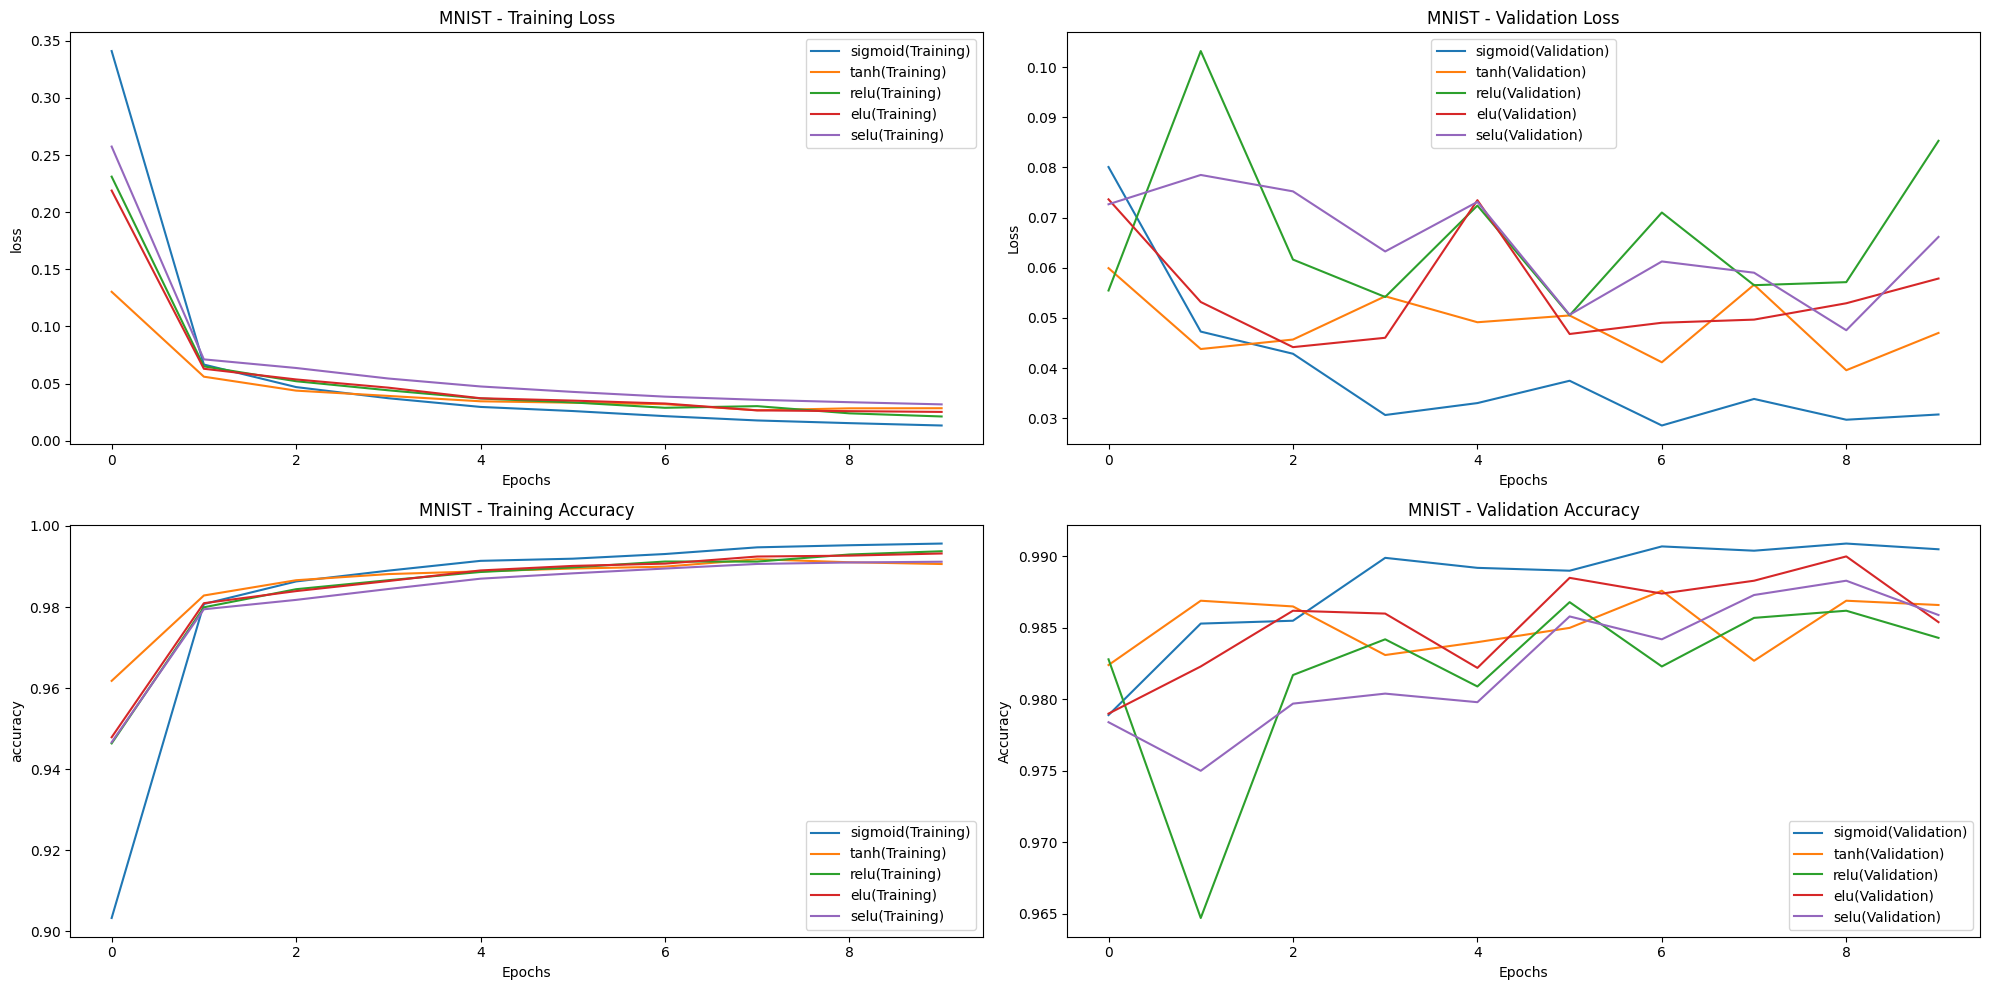

Training CIFAR10 with sigmoid activation function
Training CIFAR10 with tanh activation function
Training CIFAR10 with relu activation function
Training CIFAR10 with elu activation function
Training CIFAR10 with selu activation function


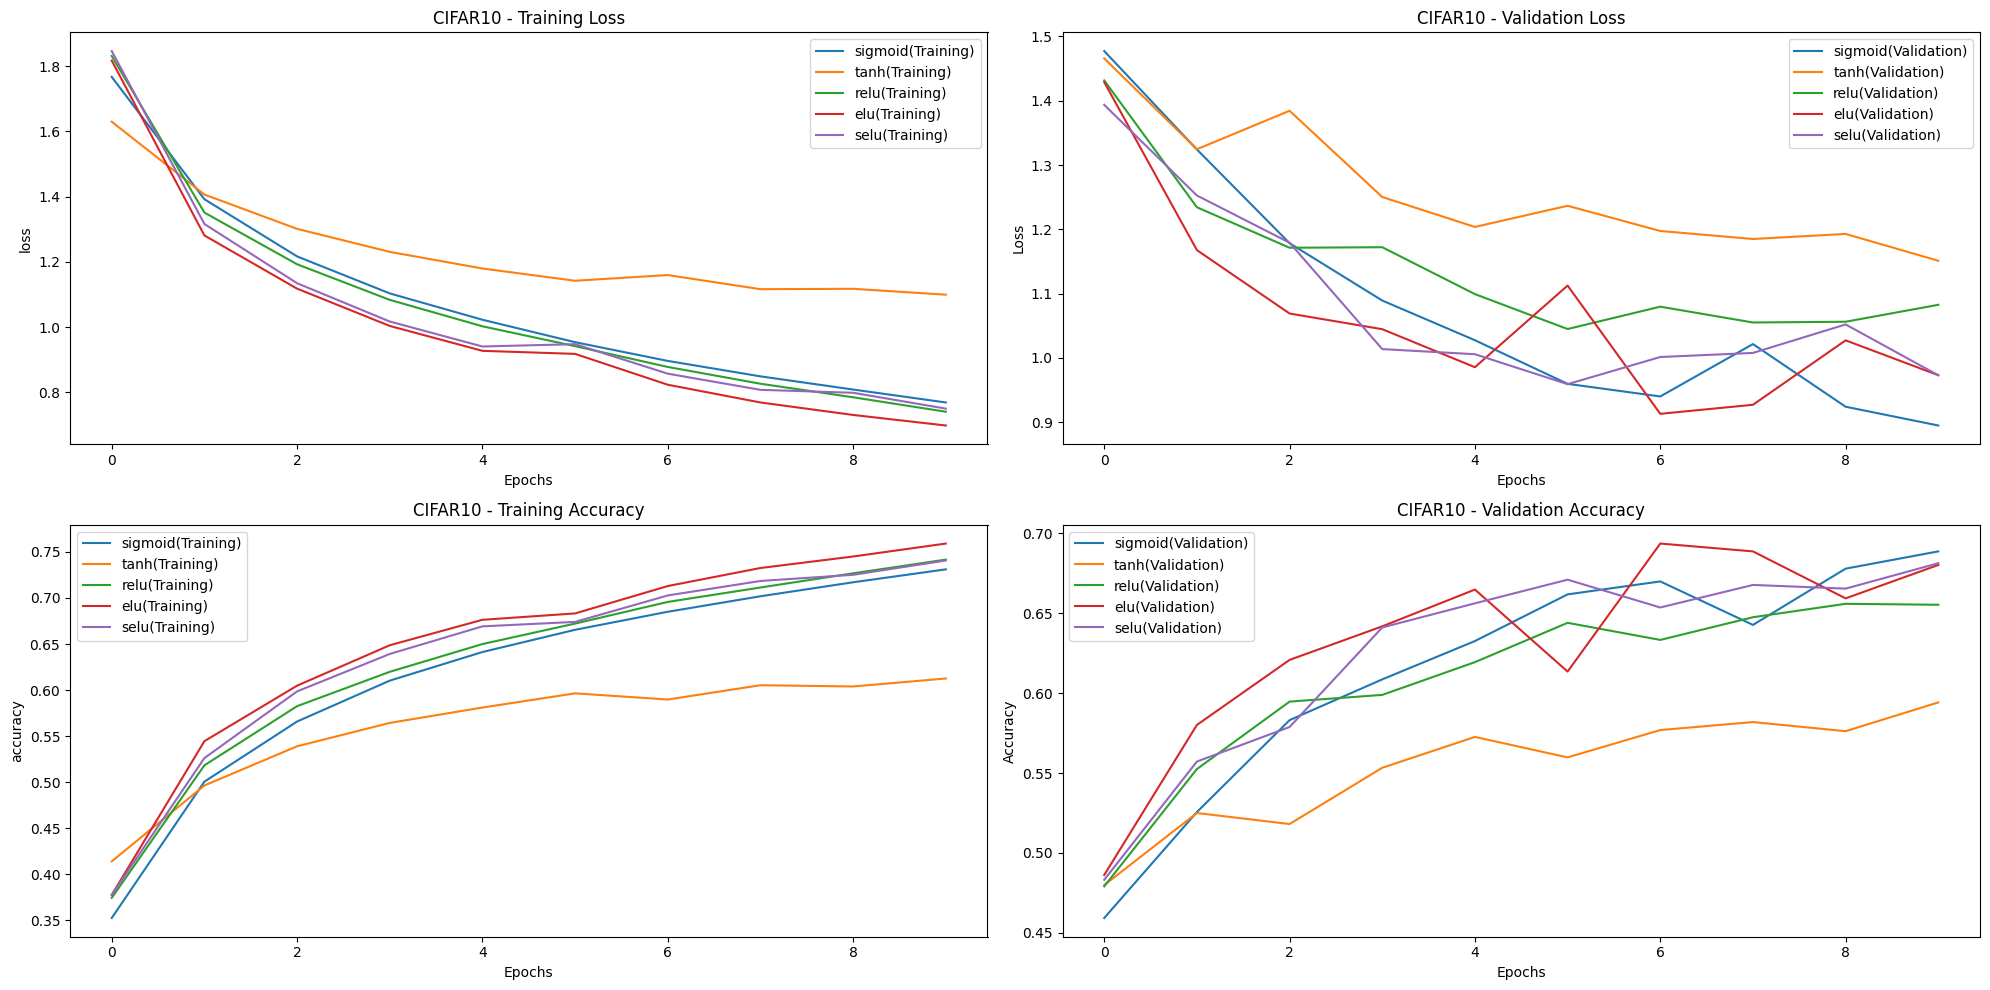

In [26]:
for dataset_name, x_train, y_train, x_test, y_test, input_shape in datasets:

  histories = {}
  for activation in activation_functions:
    print(f'Training {dataset_name} with {activation} activation function')

    model = create_model(activation, input_shape)
    history = train_and_model(model, x_train, y_train, x_test, y_test)
    histories[activation] = history

  plot_activation_comparison(histories, dataset_name)


**Notes from this activity**
**MNIST Dataset**
In this dataset, Sigmoid seem to achieve the least training and validation losses comapred to the other fuctions.  Addtionally it achives the highest training and validation accuracy. It is important to note that other functions perfom nearly as good and are very close with results too but their fluctuation in validation loss and validation accuracy makes them seem quite unstable. Therefore, the best fuction on this dataset is Sigmoid


**CIFAR-10 dataset**

In CIFAR10 dataset, ReLU and ELU have a steady decrease in training loss as comapred to others activation functions. Tanh does not produce good results in as it has high training loss. In validation loss, while sigmoid has the lowest loss in the end ELU was much more consistent in decrease of validation losss comparing to other functions. In this case, tahn still does not show promising results.
Elu also has the highest training accuracy as the number of epochs increses. Tahn still seems to not be producing good results on training accuracy. Elu aslo, while with some fluctuations, achieves the highest validation accuracy, as compared to other fuctions. With all these factors, ELU seem to be the most suitable activation function for the CIFAR-10 dataset.